[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   
2     2024-08-01 00:07:00  2024-08-01 00:26:00   
3     2024-08-01 00:10:00  2024-08-01 00:17:00   
4     2024-08-01 00:14:00  2024-08-01 00:23:00   

                                     call_transcript agent_tone customer_tone  \
0  \n\nAgent: Thank you for calling United Airlin...    neutral         angry   
1  \n\nAgent: Thank you for calling United Airlin...       calm       neutral   
2  \n\nAgent: Thank you for calling United Airlin...    neutral        polite   
3  \n\nA

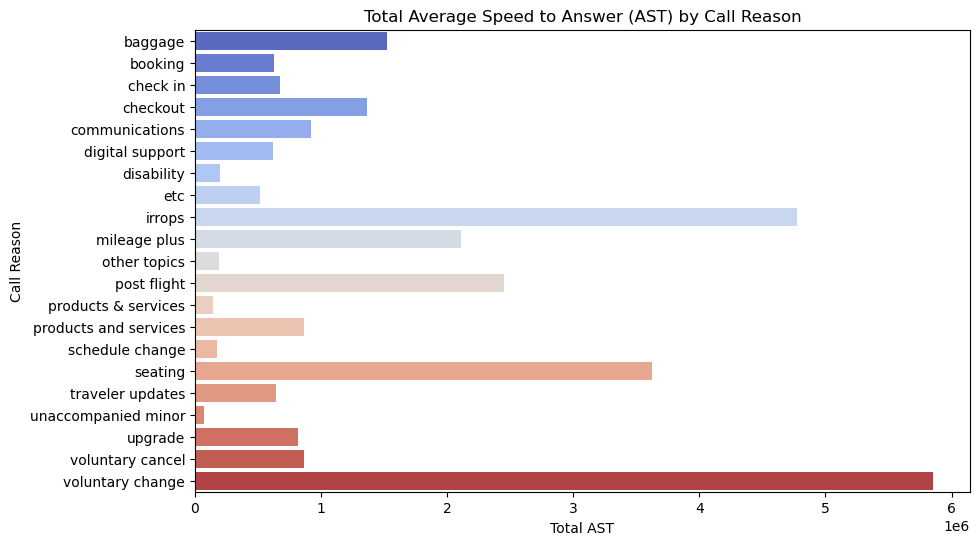

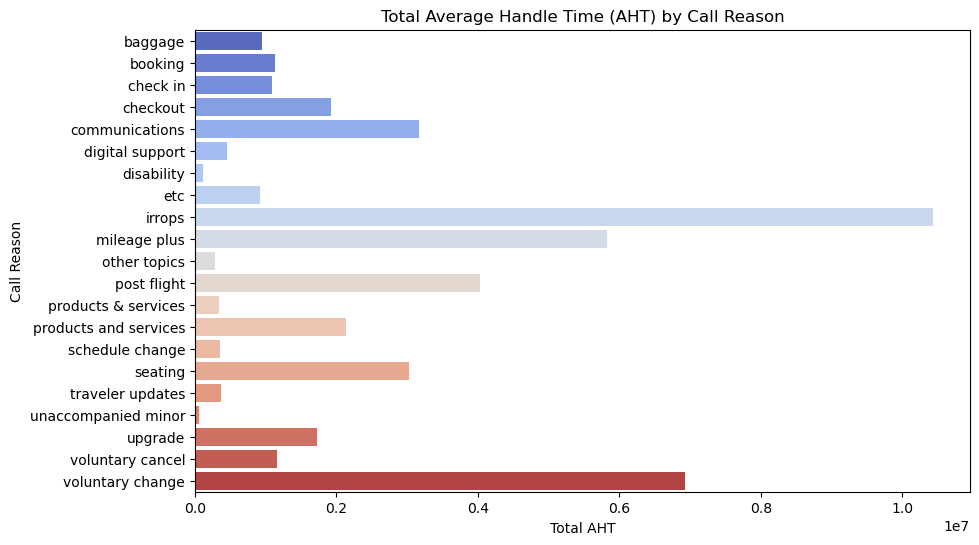

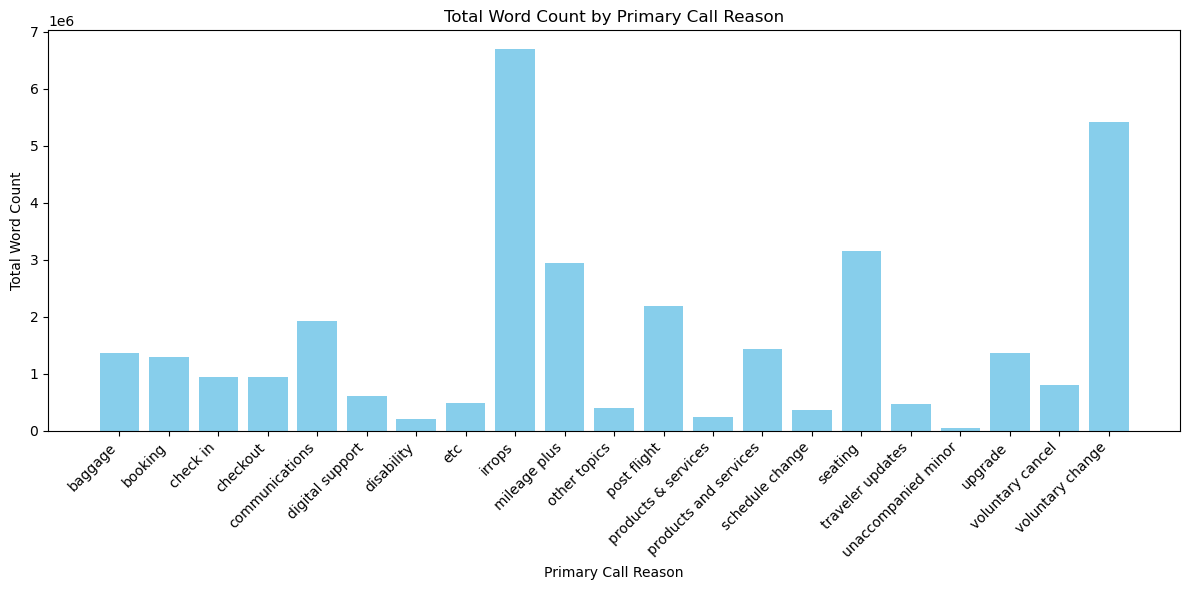

In [6]:
# Calculating Total AHT for Each Reason:
# Group the calls by primary_call_reason and sum the handle times to get the total AHT for each reason.
# Calculating Total Word Count for Each Reason:
# Calculating the word count for each transcript, and then group by primary_call_reason to get the total word count for each reason.
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Loading the CSV file
df = pd.read_csv('output_file.csv')


print(df.head())

# Define a function to clean the transcript
def clean_transcript(text):
    # Remove punctuation, special characters, and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text


df['cleaned_transcript'] = df['call_transcript'].apply(lambda x: clean_transcript(str(x)))

# Step 2: Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def tokenize(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words


df['tokens'] = df['cleaned_transcript'].apply(tokenize)

# Step 3: Clean the primary_call_reason column to remove extra spaces
df['primary_call_reason'] = df['primary_call_reason'].str.replace('-', ' ').str.strip().str.lower().str.replace(r'\s+',  ' ', regex=True)

# Group by primary_call_reason and analyze transcripts
reason_grouped = df.groupby('primary_call_reason')['cleaned_transcript'].apply(lambda x: ' '.join(x)).reset_index()

# Step to calculate total word count for each primary_call_reason
reason_grouped['total_word_count'] = reason_grouped['cleaned_transcript'].apply(lambda x: len(x.split()))

# Display total word counts
print(reason_grouped[['primary_call_reason', 'total_word_count']])


grouped_metrics = df.groupby('primary_call_reason').agg(
    total_AST=pd.NamedAgg(column='AST', aggfunc='sum'),
    total_AHT=pd.NamedAgg(column='AHT', aggfunc='sum')
).reset_index()

# Display the grouped data for AST and AHT
print("Grouped Data (Total AST and AHT by Call Reason):")
print(grouped_metrics)

# Step : Plot Total AST by call reason
plt.figure(figsize=(10, 6))
sns.barplot(x='total_AST', y='primary_call_reason', data=grouped_metrics, palette="coolwarm")
plt.title('Total Average Speed to Answer (AST) by Call Reason')
plt.xlabel('Total AST')
plt.ylabel('Call Reason')
plt.show()

# Step : Plot Total AHT by call reason
plt.figure(figsize=(10, 6))
sns.barplot(x='total_AHT', y='primary_call_reason', data=grouped_metrics, palette="coolwarm")
plt.title('Total Average Handle Time (AHT) by Call Reason')
plt.xlabel('Total AHT')
plt.ylabel('Call Reason')
plt.show()

# Plotting total word count for each primary_call_reason
plt.figure(figsize=(12, 6))
plt.bar(reason_grouped['primary_call_reason'], reason_grouped['total_word_count'], color='skyblue')
plt.title('Total Word Count by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Total Word Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
